In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # better for visuals


In [8]:
esg_data = pd.read_csv('/Users/amanmebrahtu/Downloads/S&P 500 data analysis/sp500_esg_data.csv')
price_data = pd.read_csv('/Users/amanmebrahtu/Downloads/S&P 500 data analysis/sp500_price_data.csv')


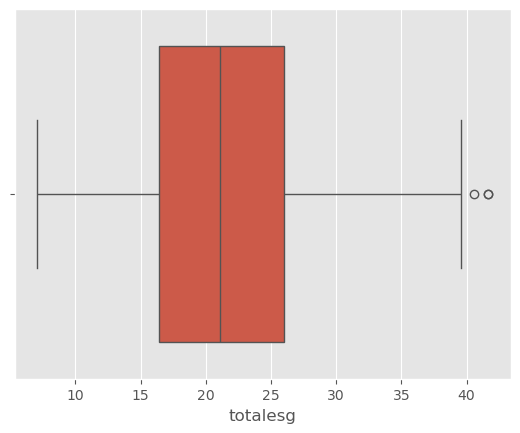

In [85]:
# Fixing data types 
esg_data['ratingyear'] = esg_data['ratingyear'].astype('int')

# Removing duplicates
esg_data.drop_duplicates(inplace=True)

#  Standardize column names
esg_data.columns = [col.lower().replace(" ", "_") for col in esg_data.columns]

#  Droping unnecessary columns
if 'highest_controversy' in esg_data.columns:
    esg_data.drop(['highest_controversy'], axis=1, inplace=True)

# Check for outliers using a boxplot
sns.boxplot(x=esg_data['totalesg'])
plt.show()




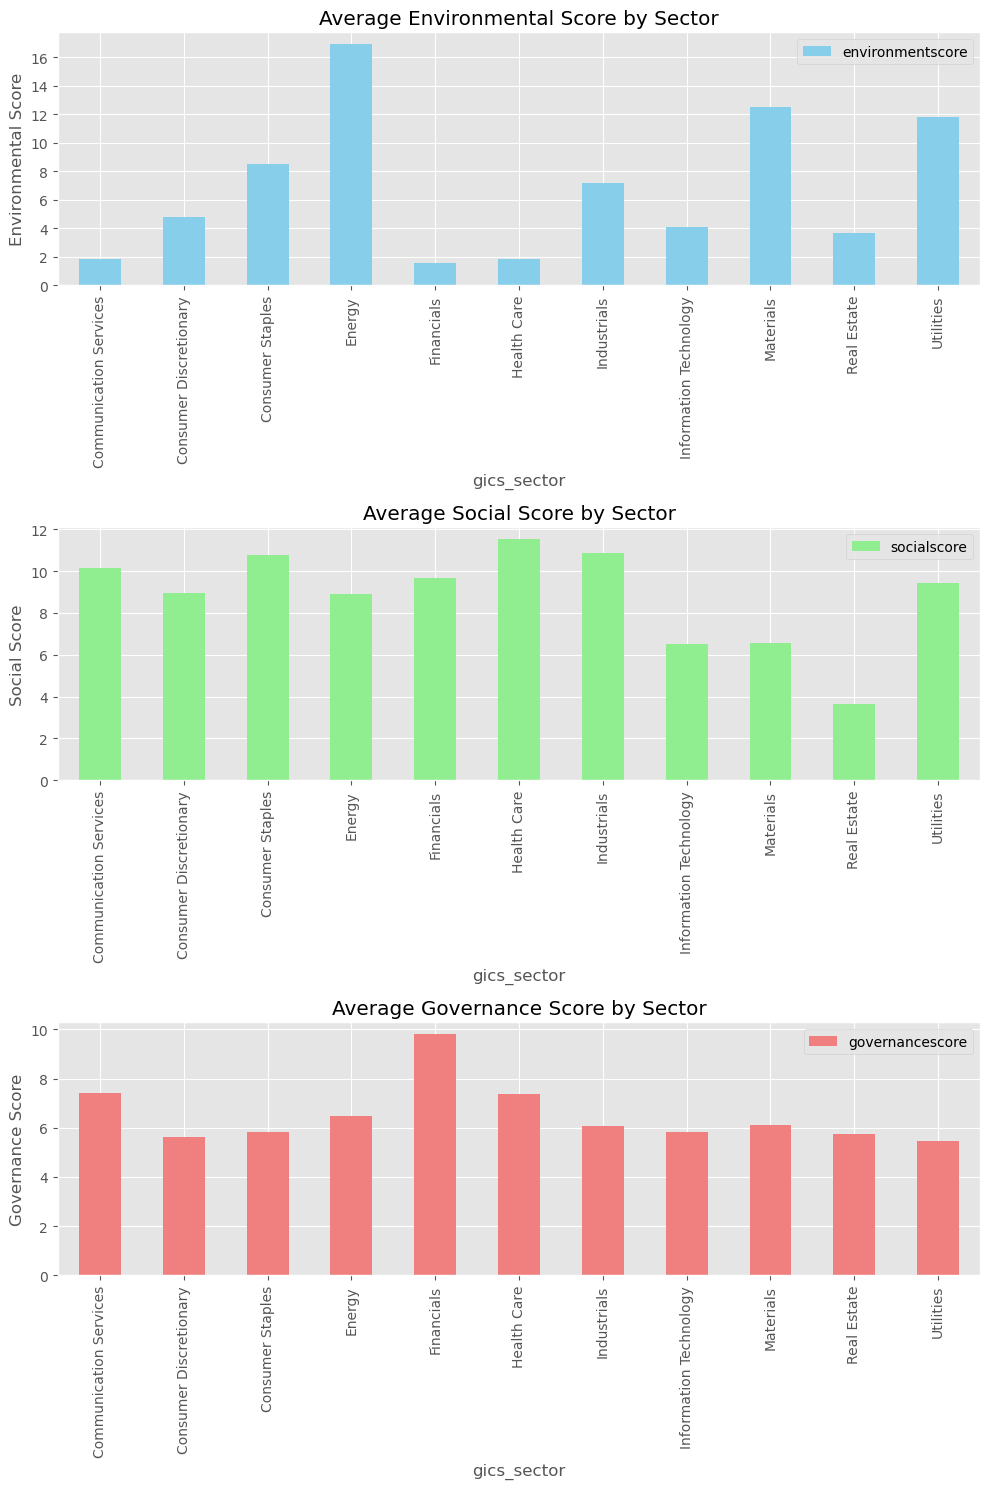

In [89]:
# Step 8: Group ESG Data by Sector and Calculate Average ESG Scores
# Grouping by 'gics_sector' and calculating the mean of ESG-related scores
esg_grouped = esg_data.groupby('gics_sector').mean(numeric_only=True)[['environmentscore', 'socialscore', 'governancescore', 'totalesg']]

# Step 9: Visualize ESG Scores by Sector
# Set plot style for better visuals
plt.style.use('ggplot')

# Plot average environmental, social, and governance scores for each sector
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Environmental Score by Sector
esg_grouped['environmentscore'].plot(kind='bar', ax=axes[0], color='skyblue', legend=True)
axes[0].set_title('Average Environmental Score by Sector')
axes[0].set_ylabel('Environmental Score')

# Social Score by Sector
esg_grouped['socialscore'].plot(kind='bar', ax=axes[1], color='lightgreen', legend=True)
axes[1].set_title('Average Social Score by Sector')
axes[1].set_ylabel('Social Score')
# Governance Score by Sector
esg_grouped['governancescore'].plot(kind='bar', ax=axes[2], color='lightcoral', legend=True)
axes[2].set_title('Average Governance Score by Sector')
axes[2].set_ylabel('Governance Score')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Step 10: Save Visualizations (Optional for GitHub)
fig.savefig('esg_scores_by_sector.png')
